169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.0488 - loss: 4.4990 - val_accuracy: 0.0743 - val_loss: 4.5103
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1357 - loss: 3.7137 - val_accuracy: 0.2229 - val_loss: 3.2066
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1909 - loss: 3.3476 - val_accuracy: 0.2836 - val_loss: 2.8582
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2365 - loss: 3.0599 - val_accuracy: 0.2996 - val_loss: 2.7765
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2757 - loss: 2.8376 - val_accuracy: 0.3495 - val_loss: 2.5338
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3074 - loss: 2.6915 - val_accuracy: 0.3442 - val_loss: 2.5943
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3461 - loss: 2.5118 - val_accuracy: 0.3573 - val_loss: 2.5657
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3708 - loss: 2.3679 - val_accuracy:

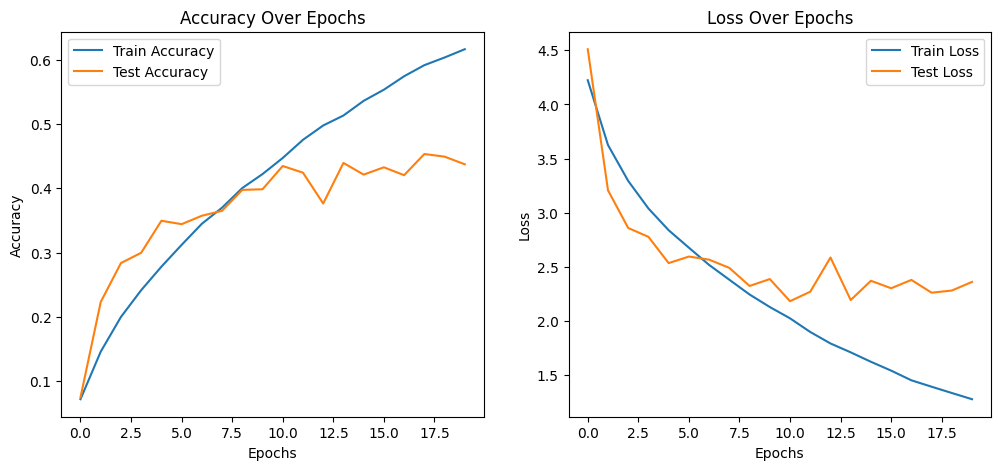

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

# Define improved LeNet model
def lenet():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

# Compile and train the model
model = lenet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()
